<a href="https://colab.research.google.com/github/philipilono/increasing_randomness/blob/main/dodis_extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with open('quantum_bitstring.txt', 'r') as file:
  txt = file.read().strip()
  bits1 = np.array([int(bit) for bit in txt])
  #file.write(''.join(str(bit) for row in bits1 for bit in row))
with open('quantum_bitstring_2.txt', 'r') as file:
  txt2 = file.read().strip()
  bits2 =  np.array([int(bit) for bit in txt2])

In [ ]:
print(len(bits1))
print(len(bits2))
# bits2 = bits2[:-1]
# print(len(bits2))

2540000
2540000


In [ ]:
print(len(bits1))
print(len(bits1.flatten()))
#print(len(bits1.tolist()[0]))

2540000
2540000


In [ ]:
# set security parameter
power = 8
eps = 10**(-power)
##### Changed eps to be a power of 2, rather than of 10. #####
print(f"Security parameter: {eps}.")

# # set number of output bits
# m = 1200
# print(f"Desired output length: {m} bits.")

# set min-entropy rates for sources
alpha_1 = 0.809031
print(f"Min-entropy rate of first source: {alpha_1}.")
alpha_2 = 0.824166
print(f"Min-entropy rate of second source: {alpha_2}")

# Set input length (assuming both inputs are the same length)
n = len(bits1.flatten())

# Calculate output length, m, for the modified Toeplitz extractor
m = int(np.floor(n * (alpha_1 + alpha_2 - 1) + 1 - 2 * power))
if m <= 0:
    print('''Output length is 0. Increase min-entropy of either input.''')

print(f"Output length: {m} bits.")
# required number of input bits (for each source)
# n = math.floor((m-1-2*math.log2(eps))
#     /(k_1+k_2-1))
# print(f"Required length of each input source: {n} bits.")

Security parameter: 1e-08.
Min-entropy rate of first source: 0.809031.
Min-entropy rate of second source: 0.824166
Output length: 1608305 bits.


In [ ]:
import cryptomite

dodis = cryptomite.Dodis(n, m)
final_output = dodis.extract(bits1.flatten(), bits2.flatten())

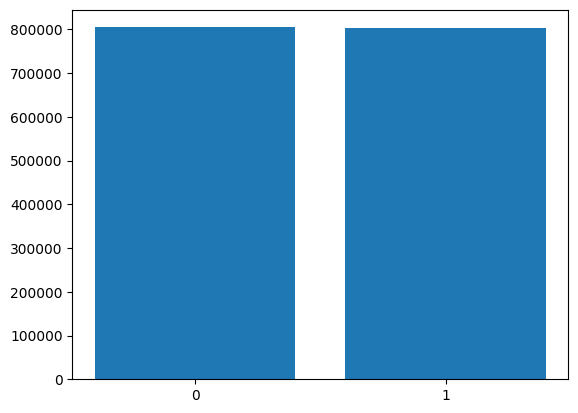

In [ ]:
num_0 = sum(1 for elem in final_output if elem == 0)
num_1 = sum(1 for elem in final_output if elem == 1)

counts = [num_0, num_1]

plt.bar(["0","1"], counts)
plt.show()

In [ ]:
print(len(final_output))

1608305
